 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [42]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [43]:
# Reading whale returns
whale_csv = Path('../Module-4-Challenge/Resources/whale_returns.csv')
whale_df = pd.read_csv(whale_csv, index_col='Date', infer_datetime_format= True, parse_dates=True)
whale_df.sort_index(inplace=True)

In [44]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [45]:
# Drop nulls
whale_df = whale_df.dropna()


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [46]:
# Reading algorithmic returns
algo_csv = Path('../Module-4-Challenge/Resources/algo_returns.csv')
algo_df = pd.read_csv(algo_csv, index_col='Date', infer_datetime_format= True,parse_dates=True)
algo_df.sort_index(inplace=True)

In [47]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [48]:
# Drop nulls
algo_df = algo_df.dropna()


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [49]:
# Reading S&P 500 Closing Prices
sp500_csv = Path('../Module-4-Challenge/Resources/sp500_history.csv')
sp500_df = pd.read_csv(sp500_csv, index_col='Date', infer_datetime_format= True, parse_dates=True)
sp500_df.sort_index(inplace=True)

In [50]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [51]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].str.replace("$",'')
sp500_df['Close'] = sp500_df['Close'].astype('float')
sp500_df['Close'].dtype


C:\Users\Justin\AppData\Local\Temp\ipykernel_14080\1937136940.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_df['Close'] = sp500_df['Close'].str.replace("$",'')


dtype('float64')

In [52]:
# Calculate Daily Returns
sp_daily_returns = sp500_df.pct_change()
sp_daily_returns


,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [53]:
# Drop nulls
sp_daily_returns.dropna(inplace=True)

In [54]:
# Rename `Close` Column to be specific to this portfolio.
sp_daily_returns.columns = ['SP500 Returns']
sp_daily_returns.loc['2015-03-03':'2015-03-06']

,SP500 Returns
Date,
2015-03-03,-0.004539
2015-03-04,-0.004389
2015-03-05,0.001196
2015-03-06,-0.014174


## Combine Whale, Algorithmic, and S&P 500 Returns

In [55]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df,algo_df,sp_daily_returns],axis = 'columns', join= 'inner')
combined_df.sort_index(inplace=True)
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

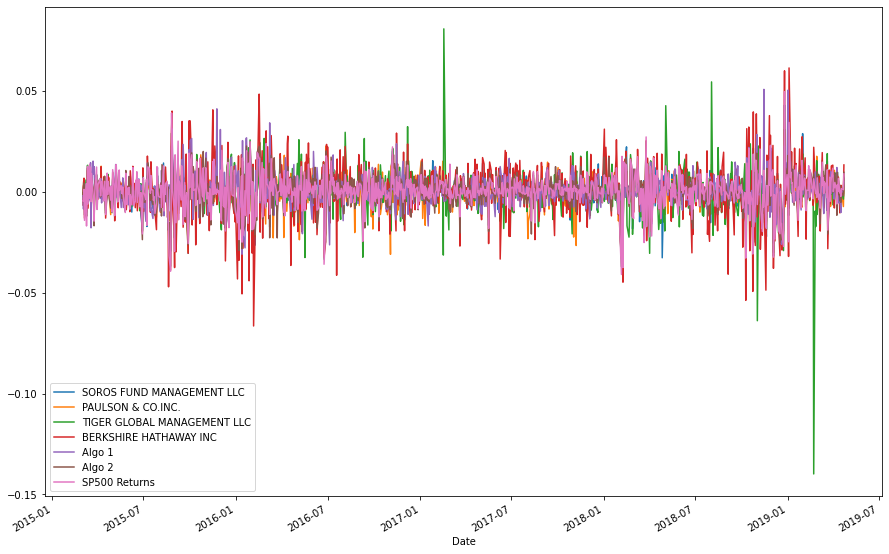

In [56]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(15,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

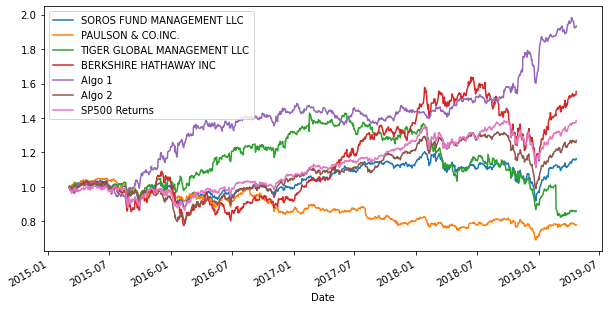

In [57]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1+combined_df).cumprod()
# Plot cumulative returns
cumulative_returns.plot(figsize=(10,5))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

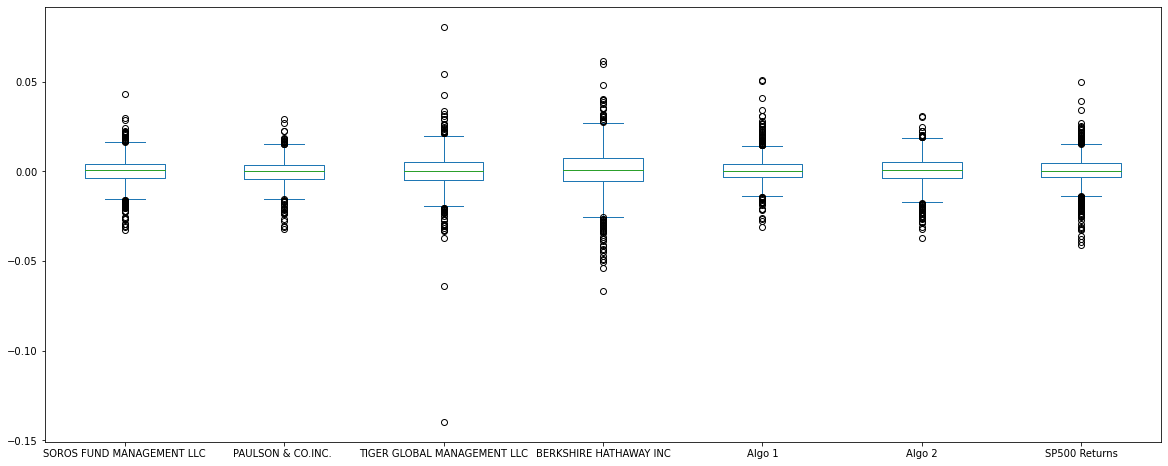

In [58]:
# Box plot to visually show risk
combined_df.plot(kind= 'box', figsize=(20,8))

### Calculate Standard Deviations

In [59]:
# Calculate the daily standard deviations of all portfolios
standard_deviation = combined_df.std()


### Determine which portfolios are riskier than the S&P 500

In [60]:
# Calculate  the daily standard deviation of S&P 500
standard_deviation.sort_values(inplace=True)
# Determine which portfolios are riskier than the S&P 500
print(standard_deviation)
print("\nThe portfolios that are riskier than the SNP500 are Tiger Global Management LLC, and Berkshire Hathaway INC")

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
SP500 Returns                  0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

The portfolios that are riskier than the SNP500 are Tiger Global Management LLC, and Berkshire Hathaway INC


### Calculate the Annualized Standard Deviation

In [61]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = standard_deviation*np.sqrt(252)
annualized_std

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
SP500 Returns                  0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

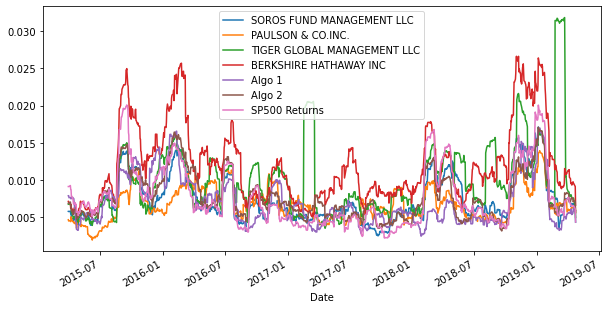

In [62]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = combined_df.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_std.plot(figsize=(10,5))

### Calculate and plot the correlation

In [63]:
# Calculate the correlation
correlation = combined_df.corr()
# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP500 Returns,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

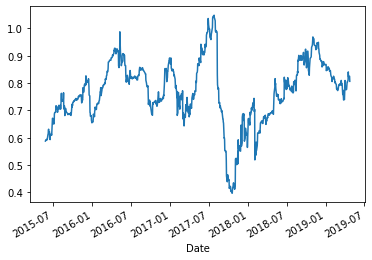

In [91]:
# Calculate covariance of a single portfolio
soros_cov = combined_df['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(combined_df['SP500 Returns'])
# Calculate variance of S&P 500
variance = combined_df['SP500 Returns'].rolling(window=60).var()
# Computing beta
beta = soros_cov/variance
# Plot beta trend
beta.plot()


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

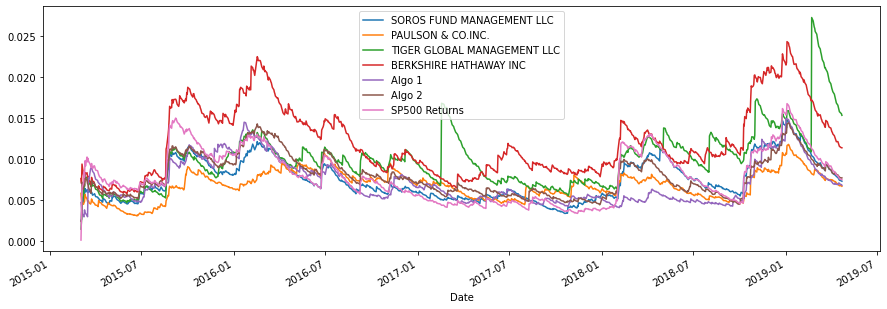

In [65]:
# Use `ewm` to calculate the rolling window
exp_ma_std = combined_df.ewm(halflife=21).std()
exp_ma_std.plot(figsize= (15,5))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [106]:
# Annualized Sharpe Ratios
annualized_sharpe = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
annualized_sharpe

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP500 Returns                  0.648267
dtype: float64

<AxesSubplot:>

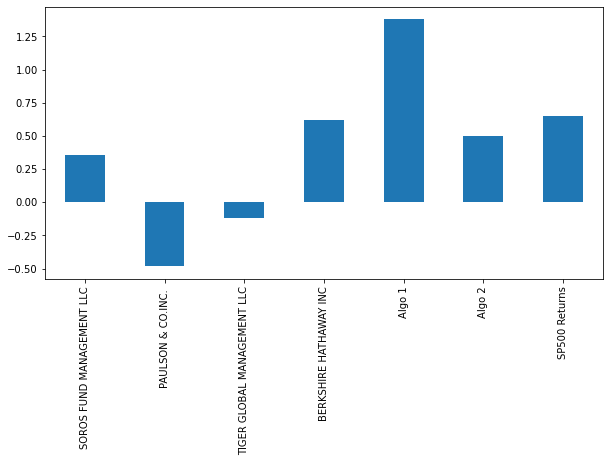

In [67]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe.plot(kind='bar', figsize= (10,5))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Starting with Algo 1, we can see that it outperforms both the SNP and all of the whale portfolios in terms of risk-to-return, due to having a higher sharpe ratio. Algo 2 appears to outperform Soros, Paulson, and Tiger Global, however, Berkshire and the SNP outperform Algo 2.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [68]:
# Reading data from 1st stock
apple = Path("../Module-4-Challenge/Resources/aapl_historical.csv")
aapl_df = pd.read_csv(apple, index_col= 'Trade DATE',infer_datetime_format= True, parse_dates=True)
aapl_df.sort_index(inplace= True)
aapl_df = aapl_df.drop(columns=['Symbol'])
aapl_df

,NOCP
Trade DATE,
2018-05-11,188.59
2018-05-14,188.15
2018-05-15,186.44
2018-05-16,188.18
2018-05-17,186.99
...,...
2019-05-03,211.75
2019-05-06,208.48
2019-05-07,202.86


In [69]:
# Reading data from 2nd stock
costco = Path("../Module-4-Challenge/Resources/cost_historical.csv")
cost_df = pd.read_csv(costco, index_col= 'Trade DATE',infer_datetime_format= True, parse_dates=True)
cost_df.sort_index(inplace= True)
cost_df = cost_df.drop(columns=['Symbol'])

In [70]:
# Reading data from 3rd stock
google = Path("../Module-4-Challenge/Resources/goog_historical.csv")
goog_df = pd.read_csv(google, index_col= 'Trade DATE',infer_datetime_format= True, parse_dates=True)
goog_df.sort_index(inplace= True)
goog_df = goog_df.drop(columns=['Symbol'])

In [71]:
# Combine all stocks in a single DataFrame
combined_port_df = pd.concat([aapl_df,cost_df,goog_df], axis = 'columns',join='inner')
combined_port_df.columns=['AAPL','COST','GOOG']
combined_port_df

,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59
...,...,...,...
2019-05-03,211.75,244.62,1185.40
2019-05-06,208.48,244.23,1189.39
2019-05-07,202.86,240.18,1174.10


In [72]:
# Calculate daily returns
portfolio_daily_returns = combined_port_df.pct_change()
# Drop NAs
portfolio_daily_returns.dropna(inplace=True)
# Display sample data
portfolio_daily_returns

,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339
...,...,...,...
2019-05-03,0.012431,0.007953,0.019602
2019-05-06,-0.015443,-0.001594,0.003366
2019-05-07,-0.026957,-0.016583,-0.012855


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [73]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
port_total_return = portfolio_daily_returns.dot(weights)
# Display sample data
port_total_return.dtype

dtype('float64')

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [74]:
# Join your returns DataFrame to the original returns DataFrame
portfolio_daily_returns['Total Returns'] = port_total_return
portfolio_daily_returns

,AAPL,COST,GOOG,Total Returns
Trade DATE,,,,
2018-05-14,-0.002333,0.000613,0.001766,0.000015
2018-05-15,-0.009088,-0.002042,-0.019060,-0.010064
2018-05-16,0.009333,0.016523,0.002354,0.009403
2018-05-17,-0.006324,0.004479,-0.002940,-0.001595
2018-05-18,-0.003637,-0.003206,-0.011339,-0.006061
...,...,...,...,...
2019-05-03,0.012431,0.007953,0.019602,0.013329
2019-05-06,-0.015443,-0.001594,0.003366,-0.004557
2019-05-07,-0.026957,-0.016583,-0.012855,-0.018798


In [75]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio_daily_returns.dropna(inplace=True)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [82]:
# Calculate the annualized `std`
portfolio_annualized_std = portfolio_daily_returns.std()*np.sqrt(252)
portfolio_annualized_std['Total Returns']

0.2102620573198797

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Trade DATE'>

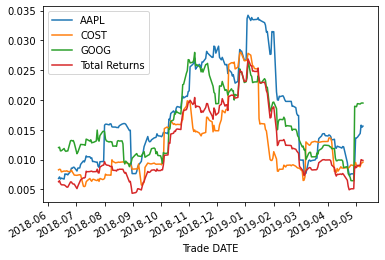

In [77]:
# Calculate rolling standard deviation
portfolio_rolling_std = portfolio_daily_returns.rolling(window=21).std()
# Plot rolling standard deviation
portfolio_rolling_std.plot()

### Calculate and plot the correlation

In [78]:
# Calculate and plot the correlation
portfolio_correlation = portfolio_daily_returns.corr()
portfolio_correlation

,AAPL,COST,GOOG,Total Returns
AAPL,1.000000,0.413546,0.655007,0.881676
COST,0.413546,1.000000,0.385145,0.687446
GOOG,0.655007,0.385145,1.000000,0.853984
Total Returns,0.881676,0.687446,0.853984,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:xlabel='Date'>

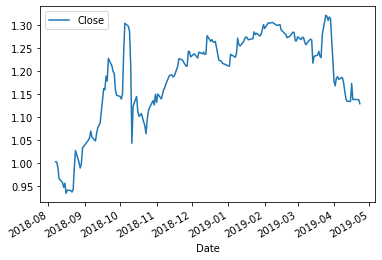

In [94]:
# Calculate and plot Beta
sp500_daily_return = sp500_df.pct_change()
sp500_var = sp500_daily_return.rolling(60).var()
cov = portfolio_daily_returns['Total Returns'].rolling(60).cov(sp500_daily_return)
new_port_beta = cov/sp500_var
new_port_beta.plot()


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [104]:
# Calculate Annualized Sharpe Ratios
port_annualized_sharpe = (portfolio_daily_returns.mean() * 252) / (portfolio_daily_returns.std() * np.sqrt(252))
port_annualized_sharpe


AAPL             0.361306
COST             1.160482
GOOG             0.349657
Total Returns    0.701280
dtype: float64

<AxesSubplot:>

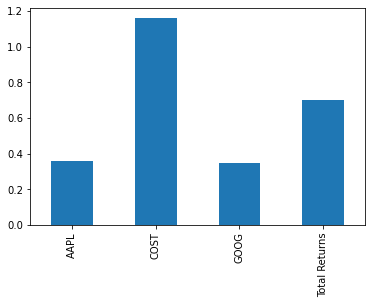

In [105]:
# Visualize the sharpe ratios as a bar plot
port_annualized_sharpe.plot(kind= 'bar')

### How does your portfolio do?

Write your answer here!

This Portfolio performed better than Soros, Paulson, Tiger, Algo 2 and Berkshire portfolios with a beta of about .7 for the entire porfolio. This portfolio was only outperformed by Algo 1. 